# Testing Zone

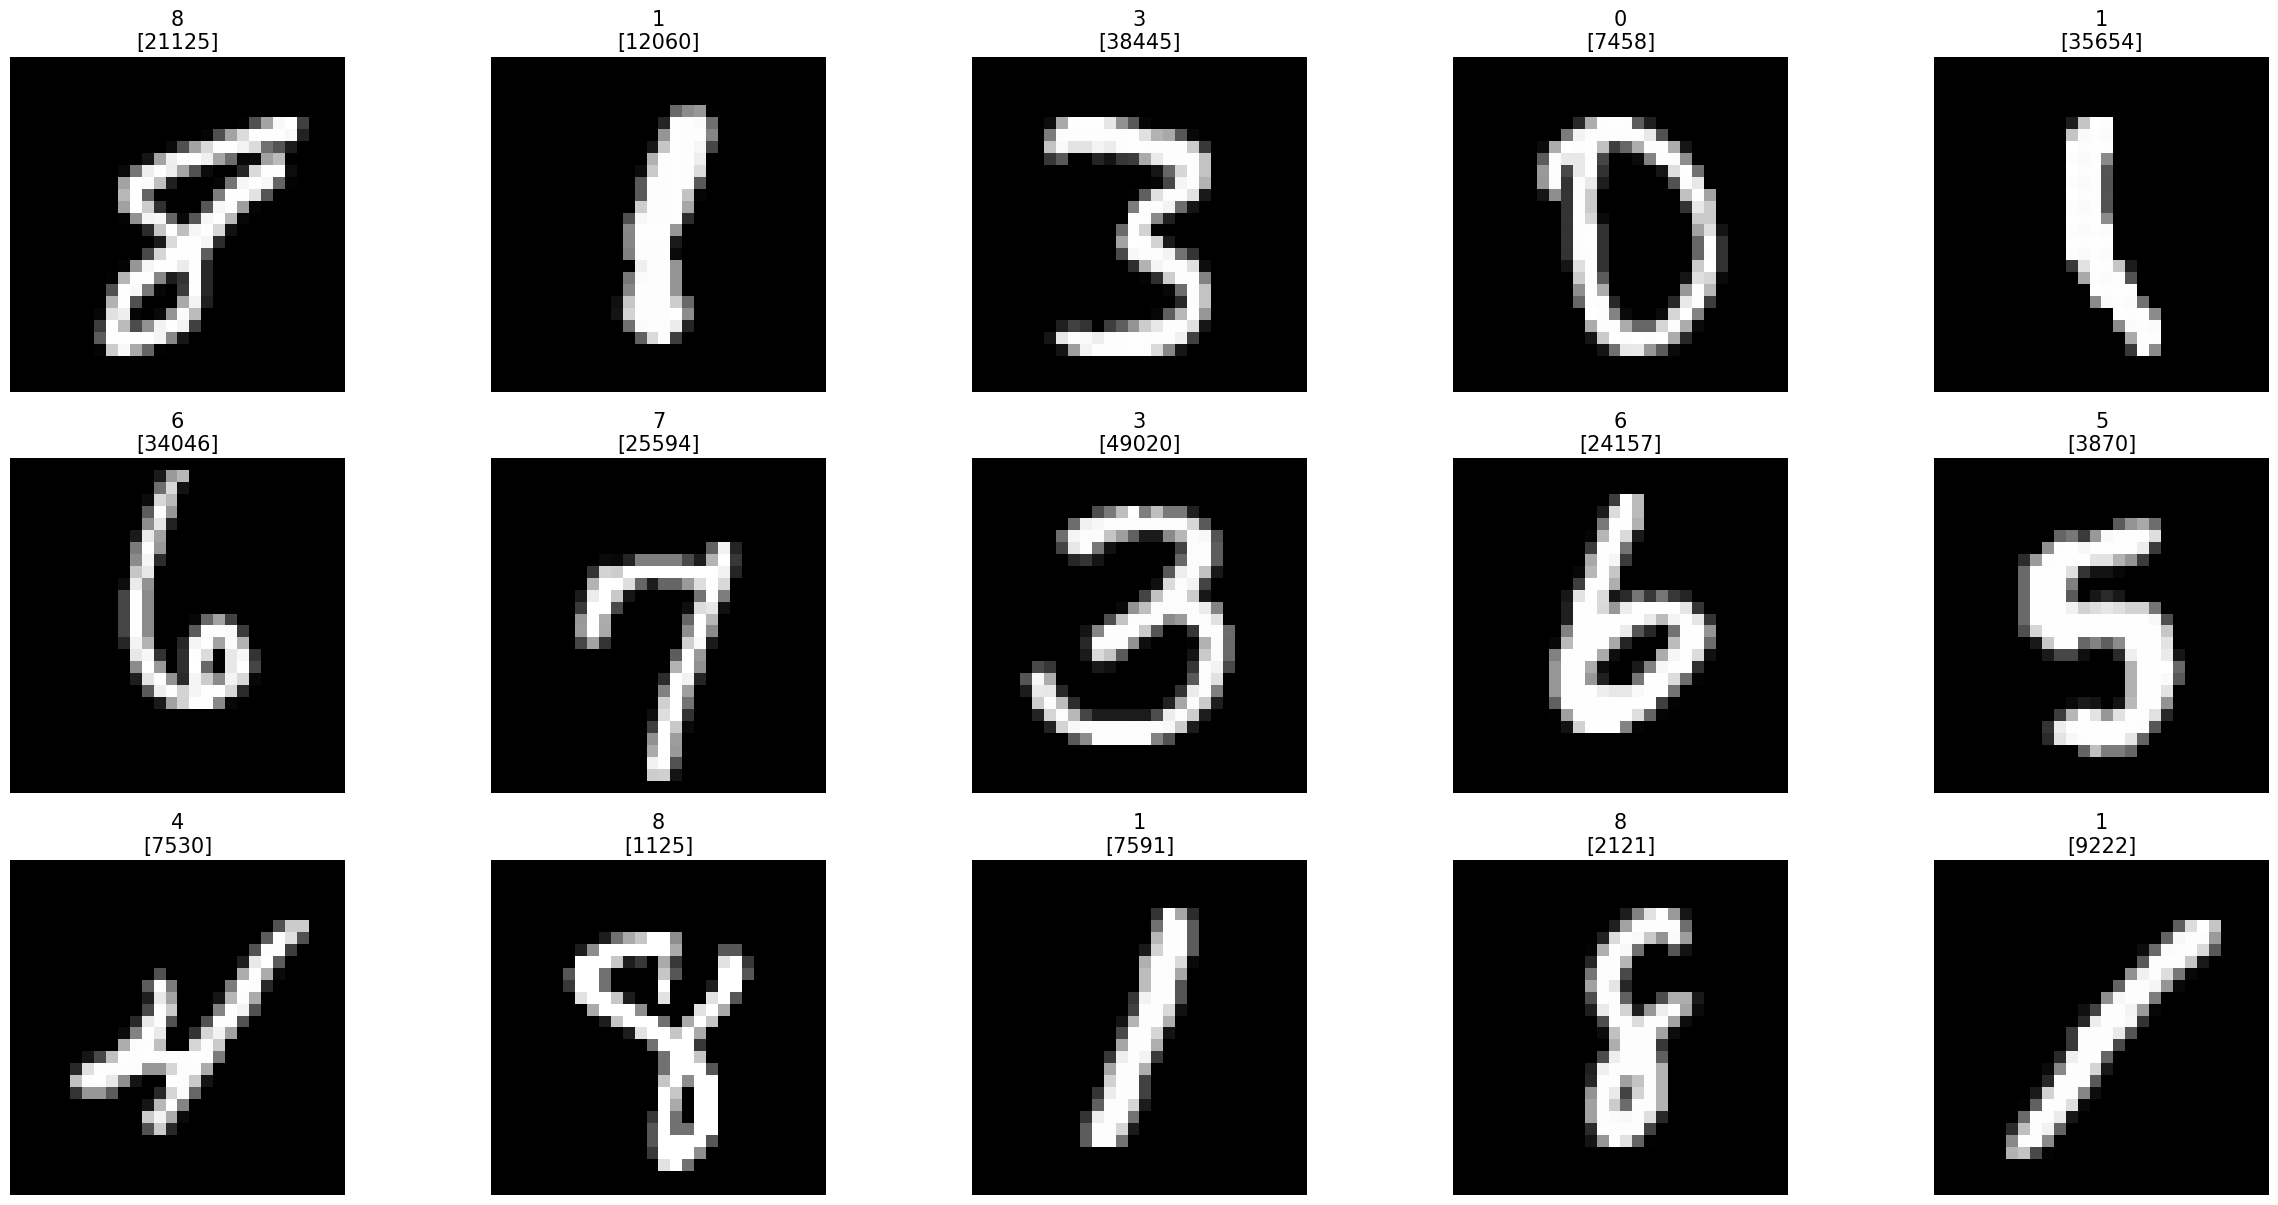

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct

class MnistDataloader(object):
    def __init__(self, train_img_path, train_lab_path,
                 test_img_path, test_lab_path):
        self.train_img_path = train_img_path
        self.train_lab_path = train_lab_path
        self.test_img_path = test_img_path
        self.test_lab_path = test_lab_path

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = np.frombuffer(file.read(), dtype=np.uint8)

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = np.frombuffer(file.read(), dtype=np.uint8).reshape(size, rows * cols)

        images_df = pd.DataFrame(image_data)
        labels_df = pd.DataFrame(labels, columns=['label'])

        return pd.concat([labels_df, images_df], axis=1)

    def load_data(self):
        train_data = self.read_images_labels(self.train_img_path, self.train_lab_path)
        test_data = self.read_images_labels(self.test_img_path, self.test_lab_path)
        return train_data, test_data

train_img_path = 'train-images.idx3-ubyte'
train_lab_path = 'train-labels.idx1-ubyte'
test_img_path = 't10k-images.idx3-ubyte'
test_lab_path = 't10k-labels.idx1-ubyte'

mnist_dataloader = MnistDataloader(train_img_path, train_lab_path, test_img_path,
                                   test_lab_path)
train_data, test_data = mnist_dataloader.load_data()

def show_images(images_df, title_texts):
    cols = 5
    rows = int(len(images_df) / cols) + 1
    plt.figure(figsize=(30, 20))
    for i, (index, row) in enumerate(images_df.iterrows(), 1):
        image = row.drop('label').values.reshape(28, 28)
        title_text = title_texts[index]
        plt.subplot(rows, cols, i)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(title_text, fontsize=15)
        plt.axis('off')

sample_train_indices = np.random.choice(train_data.index, size=10, replace=False)
sample_test_indices = np.random.choice(test_data.index, size=5, replace=False)

images_to_show = pd.concat([train_data.loc[sample_train_indices], test_data.loc[sample_test_indices]])
titles_to_show = {index: f"{label}\n[{index}]" for index, label in zip(images_to_show.index, images_to_show['label'])}

show_images(images_to_show, titles_to_show)

In [26]:
def convert(imgf,labelf,outf,n):
    f=open(imgf,"rb") #images
    o=open(outf,"w") #output
    l=open(labelf,"rb") #labels

    f.read(16)
    l.read(8)
    images=[]

    for k in range(n):
        image=[ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(p) for p in image)+'\n')
    f.close()
    o.close()
    l.close()

In [27]:
convert(train_img_path,train_lab_path,'train.csv',60000)

In [28]:
convert(test_img_path,test_lab_path,'test.csv',10000)

In [29]:
train=open('train.csv','r')
train_l=train.readlines()
train.close()
len(train_l)

60000

In [59]:
train_l[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

1st number is the label
Rest of the numbers are the greyscale RGB

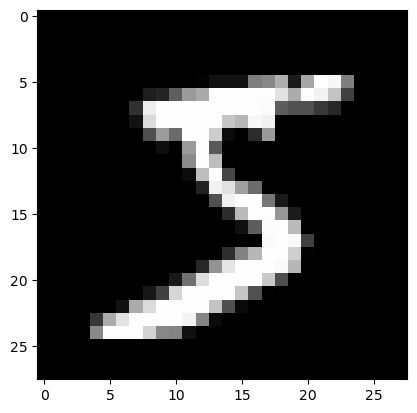

In [49]:
# plot a number for fun
num_val=train_l[0]
arr=np.asfarray(num_val.split(',')[1:]).reshape(28,28)
plt.imshow(arr, cmap='gray', interpolation='none')

Scale the data for the network since the weight needs to be adjusted properly

In [54]:
scaled_train_l=(arr/255.0*0.99)+0.01

# MNIST Neural Network

In [32]:
import numpy as np
import pandas as pd
import time

In [17]:
train_img_path = 'train-images.idx3-ubyte'
train_lab_path = 'train-labels.idx1-ubyte'
test_img_path = 't10k-images.idx3-ubyte'
test_lab_path = 't10k-labels.idx1-ubyte'

In [18]:
def convert(imgf,labelf,outf,n): # converts binary data into csv file
    f=open(imgf,"rb") #images
    o=open(outf,"w") #output
    l=open(labelf,"rb") #labels

    f.read(16)
    l.read(8)
    images=[]

    for k in range(n):
        image=[ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(p) for p in image)+'\n')
    f.close()
    o.close()
    l.close()

In [19]:
convert(train_img_path,train_lab_path,'train.csv',60000)
convert(test_img_path,test_lab_path,'test.csv',10000)

In [20]:
training_csv=open('train.csv','r')
training_list=training_csv.readlines()
training_csv.close()
len(training_list)

60000

In [21]:
testing_csv=open('test.csv','r')
testing_list=testing_csv.readlines()
testing_csv.close()
len(testing_list)

10000

In [78]:
class NN:
    def __init__(self, sizes, epochs, lr):
        self.sizes=sizes
        self.epochs=epochs
        self.lr=lr

        # # of nodes in each layer
        inp=self.sizes[0]
        h1=self.sizes[1]
        h2=self.sizes[2]
        out=self.sizes[3]

        # random weights for each layer
        self.params={
            'w1':np.random.randn(h1,inp)*np.sqrt(1./h1),
            'w2':np.random.randn(h2,h1)*np.sqrt(1./h2),
            'w3':np.random.randn(out,h2)*np.sqrt(1./out)
        }

        time_x=[]
        acc_y=[]

    #sigmoid function
    def sf(self,x,d=False):
        if d:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1+np.exp(-x))

    def softmax(self,x,d=False):
        exps=np.exp(x-x.max())
        if d:
            return exps/np.sum(exps,axis=0)*(1-exps/np.sum(exps,axis=0))
        return exps/np.sum(exps,axis=0)

    def fpass(self,x_train):
        params=self.params
        params['a0']=x_train

        params['z1']=np.dot(params['w1'],params['a0'])
        params['a1']=self.sf(params['z1'])

        params['z2']=np.dot(params['w2'],params['a1'])
        params['a2']=self.sf(params['z2'])

        params['z3']=np.dot(params['w3'],params['a2'])
        params['a3']=self.sf(params['z3'])

        return params['a3']

    def bpass(self,y_train,out):
        params=self.params
        change_w={}

        err=2*(out-y_train)/out.shape[0]*self.softmax(params['z3'],True)
        change_w['w3']=np.outer(err,params['a2'])

        err=np.dot(params['w3'].T,err)*self.sf(params['z2'],True)
        change_w['w2']=np.outer(err,params['a1'])

        err=np.dot(params['w2'].T,err)*self.sf(params['z1'],True)
        change_w['w1']=np.outer(err,params['a0'])

        return change_w


    def update(self,change_w):
        for key,value in change_w.items():
            self.params[key]-=self.lr*value

    def acc(self,test,out):
        pred=[]
        for x in training_list:
            val=x.split(',')
            inps=(np.asfarray(val[1:])/255.0*0.99)+0.01
            targets=np.zeros(int(out))
            targets[int(val[0])]=0.99
            output=self.fpass(inps)
            p=np.argmax(output)
            pred.append(p==np.argmax(targets))
        return np.mean(pred)

    def train(self,train,test,out):
        start=time.time()
        for i in range(self.epochs):
            for x in train:
                val=x.split(',')
                inps=(np.asfarray(val[1:])/255.0*0.99)+0.01
                targets=np.zeros(int(out))
                targets[int(val[0])]=0.99
                output=self.fpass(inps)
                dw=self.bpass(targets,output)
                self.update(dw)
            accuracy=self.acc(test,out)
            time_x.append(time.time()-start)
            acc_y.append(accuracy)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                i+1,time.time()-start,accuracy*100
            ))

In [ ]:
dnn=NN(sizes=[784,128,64,10],epochs=20,lr=0.001)
dnn.train(training_list,testing_list,10)

Epoch: 1, Time Spent: 52.96s, Accuracy: 24.54%
Epoch: 2, Time Spent: 112.91s, Accuracy: 32.24%
Epoch: 3, Time Spent: 181.48s, Accuracy: 35.77%
Epoch: 4, Time Spent: 249.29s, Accuracy: 37.74%
Epoch: 5, Time Spent: 296.72s, Accuracy: 40.09%
Epoch: 6, Time Spent: 356.75s, Accuracy: 43.19%
Epoch: 7, Time Spent: 420.22s, Accuracy: 46.89%
Epoch: 8, Time Spent: 477.21s, Accuracy: 50.72%
Epoch: 9, Time Spent: 529.98s, Accuracy: 54.04%
Epoch: 10, Time Spent: 587.32s, Accuracy: 56.91%
Epoch: 11, Time Spent: 632.05s, Accuracy: 59.74%
Epoch: 12, Time Spent: 772.01s, Accuracy: 62.52%
Epoch: 13, Time Spent: 822.41s, Accuracy: 65.12%
Epoch: 14, Time Spent: 881.00s, Accuracy: 67.62%
Epoch: 15, Time Spent: 928.11s, Accuracy: 69.76%
Epoch: 16, Time Spent: 972.82s, Accuracy: 71.61%
Epoch: 17, Time Spent: 1019.26s, Accuracy: 72.97%
Epoch: 18, Time Spent: 1055.81s, Accuracy: 74.11%
Epoch: 19, Time Spent: 1100.69s, Accuracy: 75.12%
